<a href="https://colab.research.google.com/github/Noobs-in-Devhack/AI---ML-/blob/main/9%20-%20SVM_Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Step 1. Import Library & Read Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart_df = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/heart.csv")

In [ ]:
heart_df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


* Age: The age of the individual in years.
* Sex: The biological sex of the individual (0 = female, 1 = male).
* Chest Pain Type: The type of chest pain experienced by the individual (e.g., typical angina, atypical angina, non-anginal pain, asymptomatic).
* Resting Blood Pressure: The resting blood pressure of the individual (in mm Hg).
* Cholesterol: The cholesterol level of the individual (in mg/dL).
* Fasting Blood Sugar: Whether the fasting blood sugar level is greater than 120 mg/dL (1 = yes, 0 = no).
* Resting Electrocardiographic Results: The results of the resting electrocardiogram (ECG) (e.g., normal, ST-T wave abnormality, left ventricular hypertrophy).
* Maximum Heart Rate Achieved: The maximum heart rate achieved during exercise.
* Exercise Induced Angina: Whether exercise induced angina was observed (1 = yes, 0 = no).
* ST Depression Induced by Exercise: The ST depression induced by exercise relative to rest (in mm).
* Peak Exercise ST Segment: The peak exercise ST segment (e.g., upsloping, flat, downsloping).
* Number of Major Vessels: The number of major blood vessels colored by fluoroscopy (0-3).
* Thalassemia: A blood disorder (e.g., normal, fixed defect, reversible defect).
* Atherosclerotic Heart Disease(AHD): The presence of heart disease (1 = heart disease present, 0 = heart disease not present).

#### Step 2. is there any Missing Values?

In [ ]:
heart_df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [ ]:
heart_df['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [ ]:
heart_df['Thal'].unique()

array(['fixed', 'normal', 'reversable'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
heart_df['AHD'] = le_encoder.fit_transform(heart_df['AHD'])

In [ ]:
df_new = pd.get_dummies(heart_df, columns = ['ChestPain','Thal'], drop_first=True).astype('int')
df_new.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2,3,0,0,0,0,1,0,0
1,67,1,160,286,0,2,108,1,1,2,3,1,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2,2,2,1,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3,3,0,0,1,0,0,1,0
4,41,0,130,204,0,2,172,0,1,1,0,0,0,1,0,1,0


##### Let's Create X & Y

In [ ]:
X = df_new.drop('AHD', axis = 1)
Y = df_new['AHD']

#### Split into Train & Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

##### Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
# kernel = 'linear','sigmoid','polynomial','rbf'
svm_ml_final = SVC(kernel = 'linear', C = 10)

In [ ]:
svm_ml_final.fit(x_train, y_train)

SVC(C=10, kernel='linear')

In [ ]:
svm_ml_final.score(x_test, y_test)

0.8852459016393442

In [ ]:
# Kernel Trick - Polynomial
svm_ml_poly = SVC(kernel = 'poly', C = 100, degree = 2)

In [ ]:
svm_ml_poly.fit(x_train, y_train)

SVC(C=100, degree=2, kernel='poly')

In [ ]:
svm_ml_poly.score(x_test, y_test)

0.8032786885245902

##### Classification Metrics

In [ ]:
y_hat = svm_ml_final.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[35,  3],
       [ 4, 19]])

<Axes: >

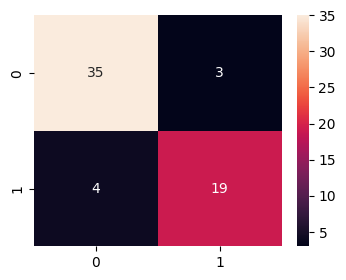

In [ ]:
plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix, annot = True, fmt = '0.0f')

In [ ]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.86      0.83      0.84        23

    accuracy                           0.89        61
   macro avg       0.88      0.87      0.88        61
weighted avg       0.88      0.89      0.88        61

